In [1]:
import os
import pandas as pd

In [6]:
os.listdir('/home/jupyter-i.tsukanov-7/shared/homeworks/python_ds_miniprojects/4/data')

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [3]:
os.getcwd()

'/home/jupyter-i.tsukanov-7/MiniProjects'

In [8]:
path = '/home/jupyter-i.tsukanov-7/shared/homeworks/python_ds_miniprojects/4/data'

In [16]:
df = pd.DataFrame()

for current_path, dirs, files in os.walk(path):
    for file in files:
        data_path = current_path + '/' + file
        
        temp_df = pd.read_csv(data_path)
        
        path_parts = current_path.split('/')
        date = path_parts[-2]
        name = path_parts[-1]
        
        temp_df['name'] = name
        temp_df['date'] = date
        
        df = pd.concat((df, temp_df))        

In [18]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [19]:
df.reset_index(drop = True, inplace = True)

In [23]:
df.head()

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05


Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. Например

Anatoly_Karpov, Nekto_Ktotovich, Lena_Uhanova, Ignat, Sasha_Tokarev

In [28]:
df.groupby('name') \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity', ascending = False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

по оси x – идентификаторы товаров (product_id) 
по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)
Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

In [32]:
top_10_prod = df.groupby('product_id', as_index = False) \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity', ascending = False).head(10)

In [33]:
import seaborn as sns

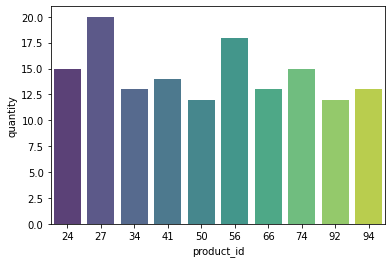

In [44]:
sns.barplot(data = top_10_prod, x = 'product_id', y = 'quantity',
           palette = 'viridis', alpha = 0.9);

In [45]:
top_10_prod.query('product_id == 56')

,product_id,quantity
42,56,18


Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).

In [48]:
sales_by_date = df.groupby('date', as_index = False) \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity', ascending = False)

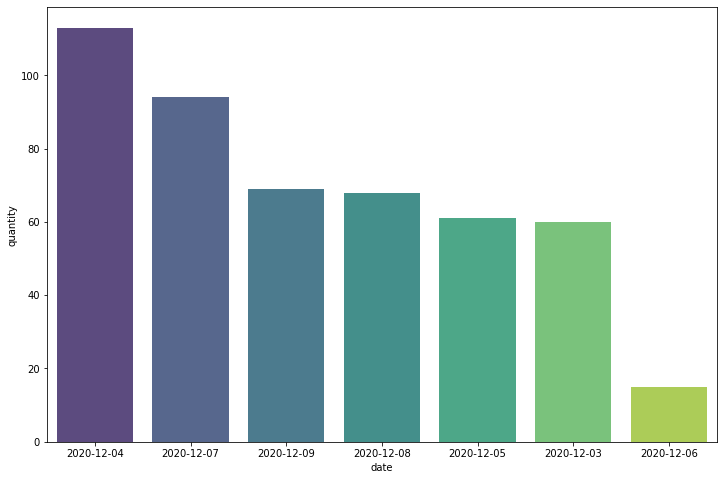

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,8))
sns.barplot(data = sales_by_date, x = 'date', y = 'quantity',
           palette = 'viridis', alpha = 0.9);

💀 Сложное задание! 💀

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.

In [52]:
df.groupby(['name','product_id']) \
    .agg({'date': pd.Series.nunique}) \
    .query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
